In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_SAT = pd.read_table('SAT.csv',sep=',')

In [3]:
df_SAT.head()

,Unnamed: 0,state,expend,ratio,salary,frac,verbal,math,sat
0,1,Alabama,4.405,17.2,31.144,8,491,538,1029
1,2,Alaska,8.963,17.6,47.951,47,445,489,934
2,3,Arizona,4.778,19.3,32.175,27,448,496,944
3,4,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,5,California,4.992,24.0,41.078,45,417,485,902


In [4]:
df_SAT.shape

(50, 9)

In [5]:
df_SAT.columns

Index([u'Unnamed: 0', u'state', u'expend', u'ratio', u'salary', u'frac',
       u'verbal', u'math', u'sat'],
      dtype='object')

#### Analizar gráficamente si los scores del test tienen una escala similar y los componentes tienen relación.

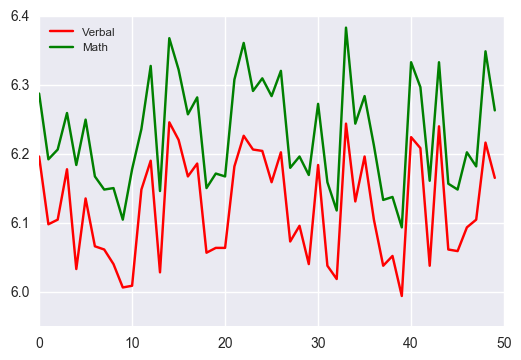

In [6]:
%matplotlib inline
verbal = df_SAT.verbal
math = df_SAT.math
sat = df_SAT.sat

cols = ['Verbal','Math']
plt.plot(np.log(verbal),'r-',np.log(math), 'g-');#, np.log(sat),'b-');
plt.legend(cols, fontsize ='small', loc='best');
#plt.legend((line1,line2,line3),('Verbal','Math','SAT'))


#### Ordenar los datos y obtener los estados que más (y menos) gastan y los que mejores (y peores) resultados obtienen.

#### Estado que mas Gasta en Educación

In [7]:
estados = df_SAT.copy()
mostExpend = estados.groupby('state').sum()[['expend']].sort_values(by='expend',ascending=False)
mostExpend.head()

,expend
state,
New Jersey,9.774
New York,9.623
Alaska,8.963
Connecticut,8.817
Rhode Island,7.469


#### Estado que mejor paga a sus profesores

In [8]:
bestSalary = estados.groupby('state').sum()[['salary']].sort_values(by='salary',ascending=False)
bestSalary.head()

,salary
state,
Connecticut,50.045
Alaska,47.951
New York,47.612
New Jersey,46.087
Pennsylvania,44.510


#### Estado que menos gasta en Educación

In [9]:
worstExpend = estados.groupby('state').sum()[['expend']].sort_values(by='expend',ascending=True)
worstExpend.head()

,expend
state,
Utah,3.656
Mississippi,4.080
Idaho,4.210
Tennessee,4.388
Alabama,4.405


#### Estados que peor paga a sus Profesores

In [10]:
worstSalary = estados.groupby('state').sum()[['salary']].sort_values(by='salary',ascending=True)
worstSalary.head()

,salary
state,
South Dakota,25.994
North Dakota,26.327
Louisiana,26.461
Mississippi,26.818
Oklahoma,28.172


#### Estados con mejor SAT

In [11]:
bestSAT = estados.groupby('state').sum()[['sat']].sort_values(by='sat',ascending=False)
bestSAT.head()

,sat
state,
North Dakota,1107
Iowa,1099
Minnesota,1085
Utah,1076
Wisconsin,1073


#### Estados con peor SAT

In [12]:
worstSAT = estados.groupby('state').sum()[['sat']].sort_values(by='sat',ascending=True)
worstSAT.head()

,sat
state,
South Carolina,844
Georgia,854
North Carolina,865
Pennsylvania,880
Indiana,882


#### Analizar de manera intuitiva con gráficos si hay relación entre las variables que indican resultados (las del test SAT) y las variables que indican gasto.

#### Gráficos de dispercion, relacion entre Gastos y SAT

En los graficos de dispersión las varibales "Expend" y "Salary" con respecto a "SAT", podemos notal que no tiene ningun tipo de relacion lineal con respecto a la variable "SAT"


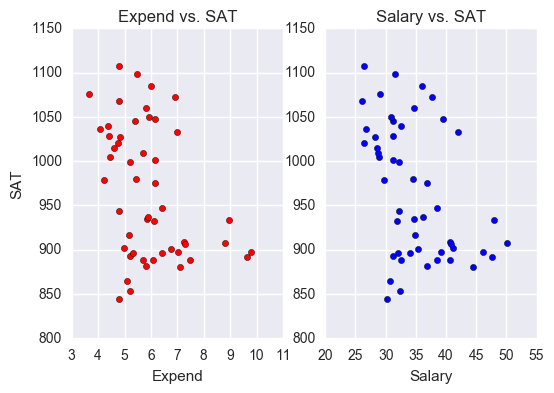

In [13]:
gastoExpend = estados.expend
gastoSalary =estados.salary
resultado = estados.sat
plt.figure(1)
plt.subplot(121)
plt.scatter(gastoExpend,resultado,c='r')
plt.title('Expend vs. SAT')
plt.xlabel('Expend')
plt.ylabel('SAT')
plt.subplot(122)
plt.scatter(gastoSalary,resultado)
plt.title('Salary vs. SAT')
plt.xlabel('Salary')
print 'En los graficos de dispersión las varibales "Expend" y "Salary" con respecto a "SAT", podemos notal que no tiene ningun tipo de relacion lineal con respecto a la variable "SAT"'

#### Utilizar correlaciones y un modelo lineal básico como exploración numérica de ese tipo de relación gasto/resultados. ¿Cuál es la conclusión aparente?

#### Correlaciones Expend vs. SAT

In [14]:
print 'Coeficiente de correlacion'
print '-----------------------------------------------------------------------------------'
print 'Coef. Expend y SAT es: ' , np.corrcoef(df_SAT.expend,df_SAT.sat)[0,1], ',Lo cual quiere decir que no tiene correlación, mientras una varibale aumenta la otra disminuye'
print '-----------------------------------------------------------------------------------'
print 'coef. Salary y SAT es: ' , np.corrcoef(df_SAT.salary,df_SAT.sat)[0,1], ',Lo cual quiere decir que no tiene correlación, mientras una variable aumenta la otra disminuye'


Coeficiente de correlacion
-----------------------------------------------------------------------------------
Coef. Expend y SAT es:  -0.380537003305 ,Lo cual quiere decir que no tiene correlación, mientras una varibale aumenta la otra disminuye
-----------------------------------------------------------------------------------
coef. Salary y SAT es:  -0.439883381442 ,Lo cual quiere decir que no tiene correlación, mientras una variable aumenta la otra disminuye


#### Modelo Regresion Lineal Expend & SAT

In [15]:
from scipy import stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_SAT.expend,df_SAT.sat)
print '---------------------------------'
print 'Modelo Regresion Linal Expend,SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print '---------------------------------------------------------------------------------------------------------------------'
print 'Analisis: el R cuadrado muestra que este modelo de regresion lineal entre el "Gasto" y "Rendimiento SAT" no es un buen modelo predictivo, se recomienda probar otros modelos no lineales'

---------------------------------
Modelo Regresion Linal Expend,SAT
---------------------------------
Slope:  -20.8921737147
Intercept:  1089.29371775
r_value^2:  0.144808410884
p_value:  0.00640796491636
std_err:  7.3282086509
---------------------------------------------------------------------------------------------------------------------
Analisis: el R cuadrado muestra que este modelo de regresion lineal entre el "Gasto" y "Rendimiento SAT" no es un buen modelo predictivo, se recomienda probar otros modelos no lineales


#### Modelo Regresion Lineal Salary & SAT

In [16]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_SAT.salary,df_SAT.sat)
print '---------------------------------'
print 'Modelo Regresion Linal Expend,SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print '---------------------------------------------------------------------------------------------------------------------'
print 'Analisis: el R cuadrado muestra que este modelo de regresion lineal entre el "Salario" y "Rendimiento SAT" no es un buen modelo predictivo, se recomienda probar otros modelos no lineales'

---------------------------------
Modelo Regresion Linal Expend,SAT
---------------------------------
Slope:  -5.53961469119
Intercept:  1158.85879691
r_value^2:  0.193497389269
p_value:  0.00139131045892
std_err:  1.63239130787
---------------------------------------------------------------------------------------------------------------------
Analisis: el R cuadrado muestra que este modelo de regresion lineal entre el "Salario" y "Rendimiento SAT" no es un buen modelo predictivo, se recomienda probar otros modelos no lineales


#### Una vez hecho lo anterior, utilizar la variable frac para dividir a los estados en grupos. Repetir el análisis de la relación gasto/resultados. ¿Las conclusiones son las mismas que en el análisis anterior?

In [17]:
estados.groupby('state').mean().sort_values(by='frac', ascending=False)[['frac']].head()

,frac
state,
Connecticut,81
Massachusetts,80
New York,74
Pennsylvania,70
New Hampshire,70


### Agrupación de Estados respecto a la Variable 'Frac'

In [18]:
print 'Maximo: ', max(estados.frac)
print 'Minimo: ', min(estados.frac)
print 'Media: ', np.mean(estados.frac)


Maximo:  81
Minimo:  4
Media:  35.24


### Primer analisis: Agrupacion por encima y por debajo de la media

Grupo1: Agrupado menor o igual a la media de la variable 'Frac'

In [19]:
grupo1 = estados[estados.frac <= np.mean(estados.frac)] 
#grupo1.shape #27 Estados
grupo1.head()

,Unnamed: 0,state,expend,ratio,salary,frac,verbal,math,sat
0,1,Alabama,4.405,17.2,31.144,8,491,538,1029
2,3,Arizona,4.778,19.3,32.175,27,448,496,944
3,4,Arkansas,4.459,17.1,28.934,6,482,523,1005
5,6,Colorado,5.443,18.4,34.571,29,462,518,980
11,12,Idaho,4.210,19.1,29.783,15,468,511,979


Grupo2: Agrupado mayor a la media de la variable 'Frac'

In [20]:
grupo2 = estados[estados.frac > np.mean(estados.frac)]
#grupo2.shape #23 Estados
grupo2.head()


,Unnamed: 0,state,expend,ratio,salary,frac,verbal,math,sat
1,2,Alaska,8.963,17.6,47.951,47,445,489,934
4,5,California,4.992,24.0,41.078,45,417,485,902
6,7,Connecticut,8.817,14.4,50.045,81,431,477,908
7,8,Delaware,7.030,16.6,39.076,68,429,468,897
8,9,Florida,5.718,19.1,32.588,48,420,469,889


### Correlacion y Regresion Lineal del Grupo1 (Menor o igual a la media de 'Frac')

In [21]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupo1.expend,grupo1.sat)
corre = np.corrcoef(grupo1.expend,grupo1.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Expend, SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'Agrupando los estados por la varibale "frac", los resultados nos arroja que haciendo una regresion lineal el modelo no es predictivo'

---------------------------------
Modelo Regresion Lineal Expend, SAT
---------------------------------
Slope:  0.250357264699
Intercept:  1022.86536659
r_value^2:  1.97286069738e-05
p_value:  0.982457816722
std_err:  11.2729530716
Correlacion:  0.00444168965303
---------------------------------------------------------------------------------------------------------------
Agrupando los estados por la varibale "frac", los resultados nos arroja que haciendo una regresion lineal el modelo no es predictivo


In [22]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupo1.salary,grupo1.sat)
corre = np.corrcoef(grupo1.salary,grupo1.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Salary, SAT'
print '---------------------------------'
print 'Slope: ', slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'Agrupando los estados por la varibale "frac", los resultados nos arroja que haciendo una regresion lineal el modelo no es predictivo'

---------------------------------
Modelo Regresion Lineal Salary, SAT
---------------------------------
Slope:  -1.26145522539
Intercept:  1064.34777042
r_value^2:  0.0113030541536
p_value:  0.597643252178
std_err:  2.35958446331
Correlacion:  -0.106315822687
---------------------------------------------------------------------------------------------------------------
Agrupando los estados por la varibale "frac", los resultados nos arroja que haciendo una regresion lineal el modelo no es predictivo


### Correlacion y Regresion Lineal del Grupo1 (Menor o igual a la media de 'Frac')

In [23]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupo2.expend,grupo2.sat)
corre = np.corrcoef(grupo2.expend,grupo2.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Expend, SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'Para el "Grupo2", el modelo de regresion no es predictivo'

---------------------------------
Modelo Regresion Lineal Expend, SAT
---------------------------------
Slope:  5.40850866032
Intercept:  861.560800201
r_value^2:  0.102364518842
p_value:  0.136678360142
std_err:  3.49496767069
Correlacion:  0.319944555887
---------------------------------------------------------------------------------------------------------------
Para el "Grupo2", el modelo de regresion no es predictivo


In [24]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(grupo2.salary,grupo2.sat)
corre = np.corrcoef(grupo2.salary,grupo2.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Salary, SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'El modelo no es predictivo, ya que su R cuadrado es muy pequeño y el pvalue es mayor al 5%'

---------------------------------
Modelo Regresion Lineal Salary, SAT
---------------------------------
Slope:  1.55363079448
Intercept:  837.956074864
r_value^2:  0.134943122666
p_value:  0.0846418345117
std_err:  0.858390943884
Correlacion:  0.367346053015
---------------------------------------------------------------------------------------------------------------
El modelo no es predictivo, ya que su R cuadrado es muy pequeño y el pvalue es mayor al 5%


### Segundo analisis: con 3 Grupos.

In [25]:
minimo = min(estados.frac)
maximo = max(estados.frac)
bins = np.linspace(minimo,maximo,4)
print 'Agrupaciones: ', bins
print 'Minimo:', minimo
print 'Maximo: ', maximo

Agrupaciones:  [  4.          29.66666667  55.33333333  81.        ]
Minimo: 4
Maximo:  81


In [26]:
group1 = estados[estados.frac < bins[1] ]
group2 = estados[(estados.frac >= bins[1])&(estados.frac < bins[2])]
group3 = estados[(estados.frac >= bins[2])&(estados.frac <= bins[3])]

### Correlacion y Regresion Lineal del Grupo1 (Expend vs. SAT)

In [27]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(group1.expend,group1.sat)
corre = np.corrcoef(group1.expend,group1.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Expend, SAT'
print '---------------------------------'
print 'Slope: ', slope
print 'Intercept: ', intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'Para este segundo analisis hicimos tres grupos de los estados por la varibale "frac", sin embargo los resultados nos sigue arrojando que el modelo de regresion lineal no es predictivo'

---------------------------------
Modelo Regresion Lineal Expend, SAT
---------------------------------
Slope:  -0.394690287131
Intercept:  1030.39009344
r_value^2:  6.08451843832e-05
p_value:  0.96983250081
std_err:  10.3281966813
Correlacion:  -0.00780033232518
---------------------------------------------------------------------------------------------------------------
Para este segundo analisis hicimos tres grupos de los estados por la varibale "frac", sin embargo los resultados nos sigue arrojando que el modelo de regresion lineal no es predictivo


### Correlacion y Regresion Lineal del Grupo2 (Expend vs. SAT)

In [28]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(group2.expend,group2.sat)
corre = np.corrcoef(group2.expend,group2.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Expend, SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'Para este segundo analisis el "Group2" es que mejor R cuadrado presenta, sin embargo los resultados nos sigue arrojando que el modelo de regresion lineal no es predictivo'

---------------------------------
Modelo Regresion Lineal Expend, SAT
---------------------------------
Slope:  9.08789478228
Intercept:  861.957217845
r_value^2:  0.295654356435
p_value:  0.207087728659
std_err:  6.27305453529
Correlacion:  0.543741074809
---------------------------------------------------------------------------------------------------------------
Para este segundo analisis el "Group2" es que mejor R cuadrado presenta, sin embargo los resultados nos sigue arrojando que el modelo de regresion lineal no es predictivo


### Correlacion y Regresion Lineal del Grupo3 (Expend vs. SAT)

In [29]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(group3.expend,group3.sat)
corre = np.corrcoef(group3.expend,group3.sat)
print '---------------------------------'
print 'Modelo Regresion Lineal Expend, SAT'
print '---------------------------------'
print 'Slope: ',slope
print 'Intercept: ',intercept
print 'r_value^2: ', rvalue**2
print 'p_value: ', pvalue
print 'std_err: ', stderr
print 'Correlacion: ', corre[0,1]
print '---------------------------------------------------------------------------------------------------------------'
print 'El modelo de regresion lineal no es predictivo, para el "Group3", dado que el pvalue es mayor al 5%, y el R cuadrado'

---------------------------------
Modelo Regresion Lineal Expend, SAT
---------------------------------
Slope:  6.28673351266
Intercept:  847.864358038
r_value^2:  0.190259911293
p_value:  0.0800555959184
std_err:  3.34871816118
Correlacion:  0.436187931164
---------------------------------------------------------------------------------------------------------------
El modelo de regresion lineal no es predictivo, para el "Group3", dado que el pvalue es mayor al 5%, y el R cuadrado


## Conclusión: la variable "expend" no tiene ninguna relacion con el puntaje obtenido en las pruebas "SAT".